In [136]:
import pandas as pd
import pdb
import os, fnmatch

In [340]:
listOfFiles = os.listdir('.')
pattern = "*.csv"
for fname in listOfFiles:
    renorm_csv(fname, alp=1e-6)

In [308]:
def renorm_csv(fname, alp=1e-6):
    df = pd.read_csv(fname)
    newfname = fname#fname.split('.')[0]+'_norm.'+fname.split('.')[1]
    for loct in df['Location'].unique():
        for targ in df['Target'].unique():
            temp = df[(df['Location'] == loct)&(df['Target']==targ)&(df['Type']=='Bin')]['Value']
            if temp.sum() < 1.0 or temp.sum() > 1.1:
                sum_temp = temp.sum()
                temp = (1-alp)*temp/temp.sum() + alp
                temp = temp/temp.sum()
                df.loc[(df['Location'] == loct)&(df['Target']==targ)&(df['Type']=='Bin'), 'Value'] = temp
    return df.to_csv(newfname)

In [233]:
list_reg = ['US National', 'HHS Region 1', 'HHS Region 2', 'HHS Region 3',
       'HHS Region 4', 'HHS Region 5', 'HHS Region 6', 'HHS Region 7',
       'HHS Region 8', 'HHS Region 9', 'HHS Region 10']

In [249]:
df1 = df[df['Location'].isin(list_reg)]

In [260]:
df1 = df1.drop(['Unnamed: 0'],axis=1)

In [328]:
listOfFiles = os.listdir('.')
pattern = "*.csv"
for fname in listOfFiles:
    df = pd.read_csv(fname)
    list_reg = ['US National', 'HHS Region 1', 'HHS Region 2', 'HHS Region 3',
       'HHS Region 4', 'HHS Region 5', 'HHS Region 6', 'HHS Region 7',
       'HHS Region 8', 'HHS Region 9', 'HHS Region 10']
    df1 = df[df['Location'].isin(list_reg)]
    df1.to_csv(fname)

In [18]:
import numpy as np
import epiweeks as epi
import matplotlib.pyplot as plt
import pandas as pd

For a given model, produce the mean score for 4 targets and 11 locations

In [282]:
def mean_score_model(csv_path_2017, csv_path_2018, model_name):
    df1 = pd.read_csv(csv_path_2017)
    df2 = pd.read_csv(csv_path_2018)
    df1['year'] = df1.apply(lambda x: '2017', axis=1)
    df2['year'] = df2.apply(lambda x: '2018', axis=1)
    df1=df1.append(df2)
    targ_weeks = ['1 wk ahead', '2 wk ahead', '3 wk ahead', '4 wk ahead']
    df1 = df1[df1.target.isin(targ_weeks)]
    df1 = df1.groupby(['year','location','target']).mean()
    df1 = df1.drop(columns=['forecast_week','competition_week','skill'])
    df1['model'] = df1.apply(lambda x: model_name, axis=1)
    return df1

In [286]:
df_accu = mean_score_model('scores_2017_accu.csv', 'scores_2018_accu.csv','accu')
df_no = mean_score_model('scores_2017_no.csv', 'scores_2018_no.csv','no')
df_ght = mean_score_model('scores_2017_ght.csv', 'scores_2018_ght.csv','ght')
df_all = mean_score_model('scores_2017_all.csv', 'scores_2018_all.csv','all')

In [318]:
df_merge=df_no.merge(df_accu, left_index=True, right_index=True, suffixes=('_no', '_accu'))


In [320]:
df_merge=df_merge.merge(df_ght, left_index=True, right_index=True) 

In [321]:
df_merge=df_merge.merge(df_all, left_index=True, right_index=True)

In [333]:
df_a = pd.read_csv('scores_2017_accu.csv')
df_a['year'] = df_a.apply(lambda x: '2017', axis=1)

In [336]:
df_a.groupby(['year','location','target']).head()

,location,target,score,forecast_week,competition_week,skill,model,year
0,HHS Region 1,Season onset,-2.427748,1,11,0.088235,ARLR_Gaussker,2017
1,HHS Region 1,Season peak week,-2.397895,1,11,0.090909,ARLR_Gaussker,2017
2,HHS Region 10,Season onset,-2.427748,1,11,0.088235,ARLR_Gaussker,2017
3,HHS Region 10,Season peak week,-2.397895,1,11,0.090909,ARLR_Gaussker,2017
4,HHS Region 2,Season onset,-2.427748,1,11,0.088235,ARLR_Gaussker,2017
5,HHS Region 2,Season peak week,-2.397895,1,11,0.090909,ARLR_Gaussker,2017
6,HHS Region 3,Season onset,-2.427748,1,11,0.088235,ARLR_Gaussker,2017
7,HHS Region 3,Season peak week,-2.397895,1,11,0.090909,ARLR_Gaussker,2017
8,HHS Region 4,Season onset,-2.427748,1,11,0.088235,ARLR_Gaussker,2017
9,HHS Region 4,Season peak week,-2.397895,1,11,0.090909,ARLR_Gaussker,2017


In [425]:
def get_means_year_model(csv_path, year, model_name):
    df1 = pd.read_csv(csv_path)
    df_mean = pd.DataFrame(columns=['year','location','target','mean_fs','std_fs','mean_ps','std_ps','mean_os','std_os'])
    for location in ['US National','HHS Region 1', 'HHS Region 10', 'HHS Region 2', 'HHS Region 3','HHS Region 4', 'HHS Region 5', 'HHS Region 6', 'HHS Region 7','HHS Region 8', 'HHS Region 9']:
        for targ in ['1 wk ahead', '2 wk ahead', '3 wk ahead', '4 wk ahead']:
            df_temp = df1[(df1['location']==location)&(df1['target']==targ)]
            df_temp = df_temp.set_index('competition_week')
            df_temp = df_temp.sort_index()
            mask = (df_mean['year']==year)&(df_mean['location']==location)&(df_mean['target']==targ)

            mean_fs = df_temp['score'].mean()
            std_fs = df_temp['score'].std()

            mean_ps = df_temp[df_temp.index.isin(range(7,20))]['score'].mean()
            std_ps = df_temp[df_temp.index.isin(range(7,20))]['score'].std()

            mean_os = df_temp[~df_temp.index.isin(range(7,20))]['score'].mean()
            std_os = df_temp[~df_temp.index.isin(range(7,20))]['score'].std()
            df_mean = df_mean.append({'year':year,'location':location, 'target':targ, 'mean_fs': mean_fs, 'std_fs': std_fs, 'mean_ps': mean_ps, 'std_ps': std_ps, 'mean_os':mean_os, 'std_os':std_os, 'model':model_name}, ignore_index=True)
    
    return df_mean
        
# plt.figure()
# plt.plot(df_temp['score'].sort_index())
# plt.figure()
# df_temp['score'].hist()

In [751]:
df_mean_all_model_year = pd.DataFrame()
for model_name in ['accu','ght', 'all', 'no', 'all_lag']:
    for year in [2017,2018]:
        csv_path='scores_{}_{}.csv'.format(year, model_name)
        df_name_var = 'df_mean_{}_{}'.format(model_name,year)
        vars()[df_name_var] = get_means_year_model(csv_path, year, model_name)
        df_mean_all_model_year = df_mean_all_model_year.append(vars()[df_name_var])
df_mean_all_model_year = df_mean_all_model_year.reset_index()

In [452]:
df_mean_all_model_year[(df_mean_all_model_year['target']=='1 wk ahead')&(df_mean_all_model_year['location']=='US National')]


,index,year,location,target,mean_fs,std_fs,mean_ps,std_ps,mean_os,std_os,model
0,0,2017,US National,1 wk ahead,-2.866361,2.787851,-4.630342,3.335041,-1.337577,0.249022,accu
44,0,2018,US National,1 wk ahead,-1.939833,0.825605,-2.277986,1.047226,-1.665083,0.464109,accu
88,0,2017,US National,1 wk ahead,-2.489572,2.090832,-3.818796,2.488125,-1.337577,0.249022,ght
132,0,2018,US National,1 wk ahead,-1.681834,0.712941,-1.953836,0.885021,-1.460832,0.453839,ght
176,0,2017,US National,1 wk ahead,-4.022174,3.428149,-6.024749,3.433908,-2.286610,2.326347,all
220,0,2018,US National,1 wk ahead,-1.681834,0.712941,-1.953836,0.885021,-1.460832,0.453839,all
264,0,2017,US National,1 wk ahead,-4.170364,3.383969,-6.570662,3.426122,-2.090106,1.427114,no
308,0,2018,US National,1 wk ahead,-3.238062,1.930755,-3.474907,2.315996,-2.953848,1.406373,no


In [752]:
df_test = df_mean_all_model_year.groupby(['model','target','location'],as_index=False).mean()

In [754]:
df_test.model.unique()

array(['accu', 'all', 'all_lag', 'ght', 'no'], dtype=object)

In [746]:
targ='1 wk ahead'
def plot_mean_log(model_name,targ, ax):
#     plt.figure(figsize=(5,10))
    plt.title(model_name)
    df_test_accu_wk = df_test[(df_test['model']==model_name)&(df_test['target']==targ)]
    df_test_accu_wk = df_test_accu_wk.set_index(['location'])
    means=df_test_accu_wk[['mean_fs','mean_os','mean_ps']]
    errors = df_test_accu_wk[['std_fs','std_ps','std_os']]
    means.plot(kind='bar',yerr=errors, ax=ax, ylim=(-10,0))
#     df_test_accu_wk.plot.bar(x=None, y=['mean_fs','mean_os','mean_ps'],yerr=['std_fs','std_os','std_ps'])
#     plt.subplot(3,1,1)
#     df_test_accu_wk['mean_fs'].plot(kind='barh',)
#     plt.subplot(3,1,2)
#     df_test_accu_wk['mean_ps'].plot(kind='barh',xerr=df_test_accu_wk['std_ps'])
#     plt.subplot(3,1,3)
#     df_test_accu_wk['mean_os'].plot(kind='barh',xerr=df_test_accu_wk['std_os'])

<Figure size 720x720 with 0 Axes>

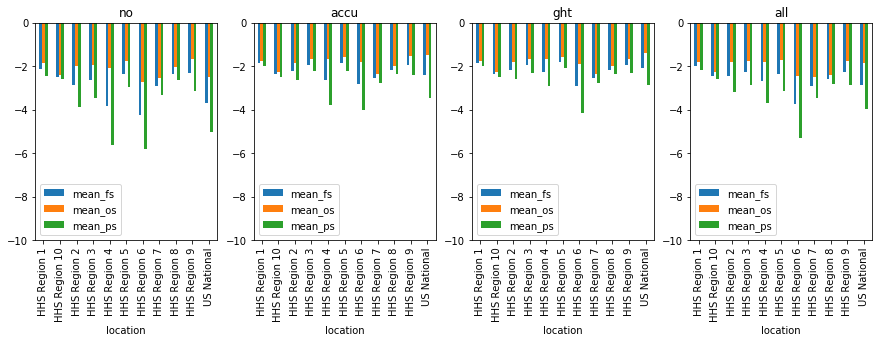

In [667]:
plt.figure(figsize=(10,10))
fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4)
list_ax = [ax1,ax2,ax3,ax4]
i=0
for model_name in ['no','accu','ght','all']:
    list_ax[i].set_title(model_name)
    plt.title(model_name)
    df_test_accu_wk = df_test[(df_test['model']==model_name)&(df_test['target']==targ)]
    df_test_accu_wk = df_test_accu_wk.set_index(['location'])
    means=df_test_accu_wk[['mean_fs','mean_os','mean_ps']]
    errors = df_test_accu_wk[['std_fs','std_ps','std_os']]
    means.plot(kind='bar',yerr=errors, ax=list_ax[i], ylim=(-10,0),figsize=(15,4))
#     plot_mean_log(model_name,targ,list_ax[i])
    i+=1

<Figure size 720x720 with 0 Axes>

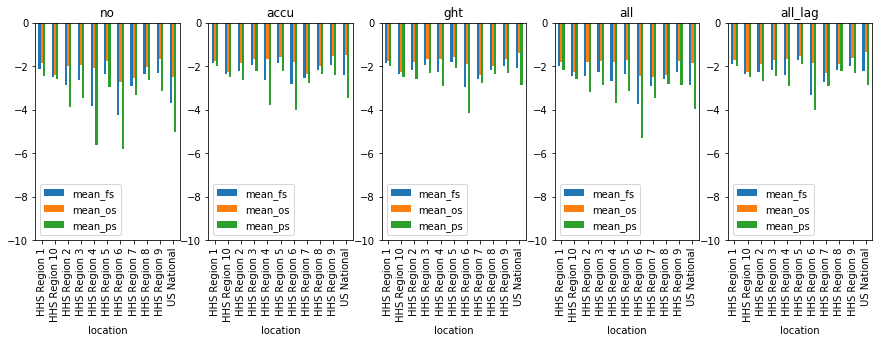

In [755]:
plt.figure(figsize=(10,10))
fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(1,5)
list_ax = [ax1,ax2,ax3,ax4,ax5]
i=0
for model_name in ['no','accu','ght','all', 'all_lag']:
    list_ax[i].set_title(model_name)
    plt.title(model_name)
    df_test_accu_wk = df_test[(df_test['model']==model_name)&(df_test['target']==targ)]
    df_test_accu_wk = df_test_accu_wk.set_index(['location'])
    means=df_test_accu_wk[['mean_fs','mean_os','mean_ps']]
    errors = df_test_accu_wk[['std_fs','std_ps','std_os']]
    means.plot(kind='bar',yerr=errors, ax=list_ax[i], ylim=(-10,0),figsize=(15,4))
#     plot_mean_log(model_name,targ,list_ax[i])
    i+=1

In [615]:
list_ax

In [465]:
df_test[df_test['model']=='ght']['mean_fs'].plot(kind='bar', yerr=df_test[df_test['model']=='ght']['std_fs'])

KeyError: 'model'

In [191]:
print(mean_fs, std_fs)
print(mean_ps, std_ps)
print(mean_os, std_os)

-2.8663610163766955 2.7878507387595857
-4.6303422085023 3.3350408569038343
-1.3375773165345062 0.24902200173229866


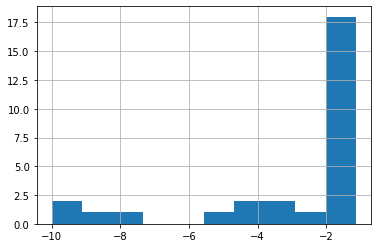

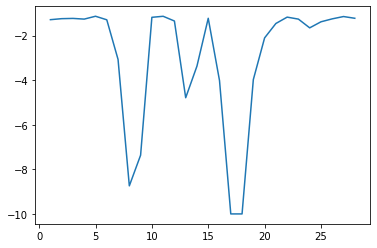

In [150]:
plt.plot(df_temp['score'].sort_index())

In [158]:
df_temp.loc[7:19,'score'].mean()

-4.6303422085023

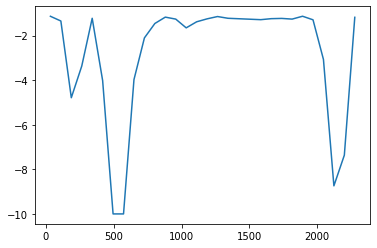

In [113]:
plt.plot(df1[(df1['location']=='US National')&(df1['target']=='1 wk ahead')]['score'])

In [75]:
len(df_temp.sort_values(['competition_week'])['score'])

28

In [22]:
df2 = df1.groupby(['location','target'], as_index=False).mean()
dfn2 = dfn.groupby(['location','target'], as_index=False).mean()

In [24]:
for wk in ['1 wk ahead','2 wk ahead','3 wk ahead','4 wk ahead']:
    df_mean = df2[df2['target']==wk].drop(['forecast_week','competition_week','target'],axis=1)
    dfn_mean = dfn2[dfn2['target']==wk].drop(['forecast_week','competition_week','target'],axis=1)
    df_merge = df_mean.merge(dfn_mean, left_on='location', right_on='location')
    tmp_txt = df_merge.to_latex()
    f = open("table_2018_2017.txt", "a")
    f.write(tmp_txt)
    f.close()


In [732]:
df_wtr = pd.read_csv('../data/data-aw-whole_20191108_1605-weekly-nation.csv')

In [733]:
targ_dict = {"target" : [], "ght_target" : ['flu', 'cough', 'fever', 'influenza', 'cold'], "aw_target" : ['temperature_max', 'temperature_min','temperature_mean', 'RH_max', 'RH_min', 'RH_mean', 'wind_speed_mean','cloud_cover_mean', 'water_total', 'pressure_max', 'pressure_min','pressure_mean', 'AH_max', 'AH_min', 'AH_mean', 'SH_max', 'SH_min','SH_mean']}

In [734]:
for tar in targ_dict['aw_target']:
    for i in range(0,6):
        label = '{}_{}'.format(tar,i)
        df_wtr[label] = df_wtr[tar].shift(i)
    df_wtr=df_wtr.drop(tar,axis=1)

In [735]:
df_wtr

,area_id,date,temperature_max_0,temperature_max_1,temperature_max_2,temperature_max_3,temperature_max_4,temperature_max_5,temperature_min_0,temperature_min_1,...,SH_min_2,SH_min_3,SH_min_4,SH_min_5,SH_mean_0,SH_mean_1,SH_mean_2,SH_mean_3,SH_mean_4,SH_mean_5
0,USA,2009-12-30,43.8953,NaN,NaN,NaN,NaN,NaN,22.3226,NaN,...,NaN,NaN,NaN,NaN,0.003132,NaN,NaN,NaN,NaN,NaN
1,USA,2010-01-06,41.1108,43.8953,NaN,NaN,NaN,NaN,19.1902,22.3226,...,NaN,NaN,NaN,NaN,0.002533,0.003132,NaN,NaN,NaN,NaN
2,USA,2010-01-13,53.1583,41.1108,43.8953,NaN,NaN,NaN,18.6526,19.1902,...,0.002037,NaN,NaN,NaN,0.003463,0.002533,0.003132,NaN,NaN,NaN
3,USA,2010-01-20,52.8338,53.1583,41.1108,43.8953,NaN,NaN,36.2620,18.6526,...,0.001795,0.002037,NaN,NaN,0.005167,0.003463,0.002533,0.003132,NaN,NaN
4,USA,2010-01-27,53.8615,52.8338,53.1583,41.1108,43.8953,NaN,24.8508,36.2620,...,0.001739,0.001795,0.002037,NaN,0.004016,0.005167,0.003463,0.002533,0.003132,NaN
5,USA,2010-02-03,46.9809,53.8615,52.8338,53.1583,41.1108,43.8953,23.8399,24.8508,...,0.003971,0.001739,0.001795,0.002037,0.004029,0.004016,0.005167,0.003463,0.002533,0.003132
6,USA,2010-02-10,44.4665,46.9809,53.8615,52.8338,53.1583,41.1108,26.5476,23.8399,...,0.002607,0.003971,0.001739,0.001795,0.003420,0.004029,0.004016,0.005167,0.003463,0.002533
7,USA,2010-02-17,51.7585,44.4665,46.9809,53.8615,52.8338,53.1583,27.7348,26.5476,...,0.002573,0.002607,0.003971,0.001739,0.003510,0.003420,0.004029,0.004016,0.005167,0.003463
8,USA,2010-02-24,52.7392,51.7585,44.4665,46.9809,53.8615,52.8338,30.0712,27.7348,...,0.002447,0.002573,0.002607,0.003971,0.004045,0.003510,0.003420,0.004029,0.004016,0.005167
9,USA,2010-03-03,56.8984,52.7392,51.7585,44.4665,46.9809,53.8615,32.6178,30.0712,...,0.002470,0.002447,0.002573,0.002607,0.003900,0.004045,0.003510,0.003420,0.004029,0.004016


In [709]:
aw = df_wtr.columns[2:]

In [740]:
targ_dict['aw_target'] = df_wtr.columns[2:].to_list()

In [741]:
targ_dict

{'target': [],
 'ght_target': ['flu', 'cough', 'fever', 'influenza', 'cold'],
 'aw_target': ['temperature_max_0',
  'temperature_max_1',
  'temperature_max_2',
  'temperature_max_3',
  'temperature_max_4',
  'temperature_max_5',
  'temperature_min_0',
  'temperature_min_1',
  'temperature_min_2',
  'temperature_min_3',
  'temperature_min_4',
  'temperature_min_5',
  'temperature_mean_0',
  'temperature_mean_1',
  'temperature_mean_2',
  'temperature_mean_3',
  'temperature_mean_4',
  'temperature_mean_5',
  'RH_max_0',
  'RH_max_1',
  'RH_max_2',
  'RH_max_3',
  'RH_max_4',
  'RH_max_5',
  'RH_min_0',
  'RH_min_1',
  'RH_min_2',
  'RH_min_3',
  'RH_min_4',
  'RH_min_5',
  'RH_mean_0',
  'RH_mean_1',
  'RH_mean_2',
  'RH_mean_3',
  'RH_mean_4',
  'RH_mean_5',
  'wind_speed_mean_0',
  'wind_speed_mean_1',
  'wind_speed_mean_2',
  'wind_speed_mean_3',
  'wind_speed_mean_4',
  'wind_speed_mean_5',
  'cloud_cover_mean_0',
  'cloud_cover_mean_1',
  'cloud_cover_mean_2',
  'cloud_cover_mean_3

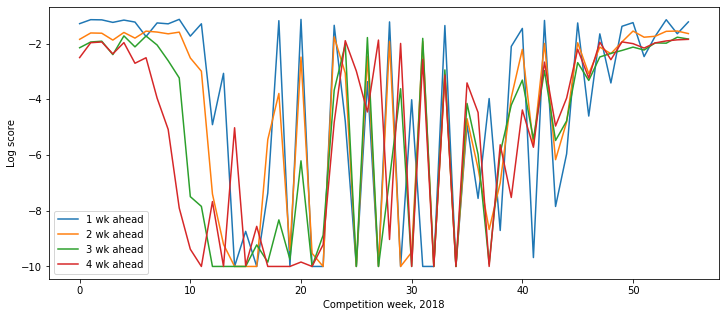

In [25]:
plt.figure(figsize=(12,5))
for wk in ['1 wk ahead','2 wk ahead','3 wk ahead','4 wk ahead']:
    df_temp = df1[(df1['location']=='US National')&(df1['target']==wk)]
    df_temp = df_temp.sort_values(['competition_week'])
    plt.plot((df_temp['score'].values),label = wk)
    plt.xlabel('Competition week, 2018')
    plt.ylabel('Log score')
plt.legend()

In [46]:
df1[(df1['location']=='US National')&(df1['target']=='1 wk ahead')]

,location,target,score,forecast_week,competition_week,skill,model
33,US National,1 wk ahead,-1.132351,1,11,0.322275,2017/ARLR_Gaussker
110,US National,1 wk ahead,-1.344313,2,12,0.260719,2017/ARLR_Gaussker
187,US National,1 wk ahead,-4.786558,3,13,0.008341,2017/ARLR_Gaussker
264,US National,1 wk ahead,-3.366847,4,14,0.034498,2017/ARLR_Gaussker
341,US National,1 wk ahead,-1.222014,5,15,0.294636,2017/ARLR_Gaussker
418,US National,1 wk ahead,-4.016363,6,16,0.018018,2017/ARLR_Gaussker
495,US National,1 wk ahead,-10.000000,7,17,0.000045,2017/ARLR_Gaussker
572,US National,1 wk ahead,-10.000000,8,18,0.000045,2017/ARLR_Gaussker
649,US National,1 wk ahead,-3.973175,9,19,0.018814,2017/ARLR_Gaussker
726,US National,1 wk ahead,-2.102317,10,20,0.122173,2017/ARLR_Gaussker


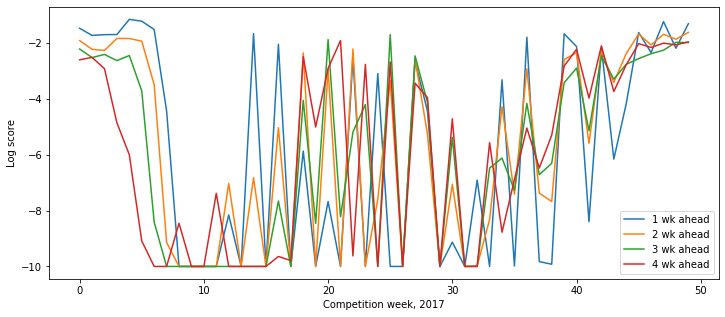

In [26]:
plt.figure(figsize=(12,5))
for wk in ['1 wk ahead','2 wk ahead','3 wk ahead','4 wk ahead']:
    dfn_temp = dfn[(dfn['location']=='US National')&(dfn['target']==wk)]
    dfn_temp = dfn_temp.sort_values(['competition_week'])
    plt.plot((dfn_temp['score'].values),label = wk)
    plt.xlabel('Competition week, 2017')
    plt.ylabel('Log score')
plt.legend()

In [524]:
df_temp.sort_values(['competition_week'])

,location,target,score,forecast_week,competition_week,skill,model
1815,US National,4 wk ahead,-2.010013,42,0,0.133987,ARLR
1892,US National,4 wk ahead,-2.770448,43,1,0.062634,ARLR
1969,US National,4 wk ahead,-2.668158,44,2,0.069380,ARLR
2046,US National,4 wk ahead,-2.454539,45,3,0.085903,ARLR
2123,US National,4 wk ahead,-3.194749,46,4,0.040977,ARLR
2200,US National,4 wk ahead,-2.925176,47,5,0.053655,ARLR
2277,US National,4 wk ahead,-3.414998,48,6,0.032876,ARLR
2354,US National,4 wk ahead,-2.988803,49,7,0.050348,ARLR
2431,US National,4 wk ahead,-2.180435,50,8,0.112992,ARLR
2508,US National,4 wk ahead,-3.152135,51,9,0.042761,ARLR


(array([9., 0., 0., 0., 1., 2., 1., 1., 6., 8.]),
 array([-10.        ,  -9.06501976,  -8.13003952,  -7.19505928,
         -6.26007904,  -5.32509881,  -4.39011857,  -3.45513833,
         -2.52015809,  -1.58517785,  -0.65019761]),
 <a list of 10 Patch objects>)

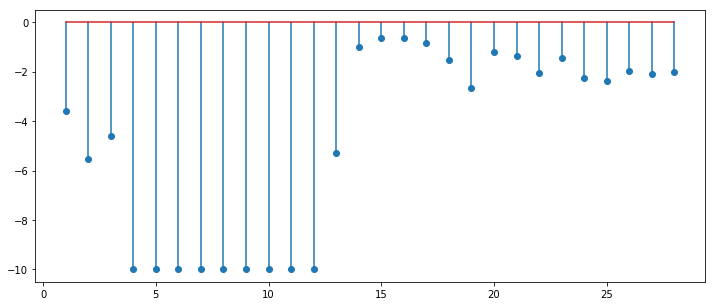

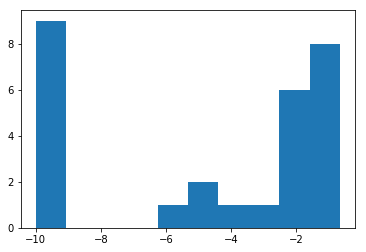

In [421]:
plt.figure(figsize=(12,5))
plt.stem(df_temp['competition_week'].values,(df_temp['score'].values))
plt.figure();plt.hist(df_temp['score'].values)

In [416]:
df_temp['competition_week'].values

array([11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27,
       28,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [452]:
pwd

'/Users/A.Adiga/work/Forecasting/ARLR_codes/output'

In [535]:
str(1)

'1'

In [537]:
'{:02}'.format(10)

'10'

In [541]:
import datetime
import epiweeks as ep

In [551]:
ep.date(datetime.date(2019,1,1))

TypeError: an integer is required (got type datetime.date)

In [566]:
ww = ep.Week(int(2019), int(21))

In [569]:
(ww).startdate()+ep.timedelta(days=1)

datetime.date(2019, 5, 20)

In [574]:
ll = ['Alabama', 'Alaska']
df.drop(df[df['Location']==ll].index)

ValueError: Lengths must match to compare

In [576]:
df.drop(df[(df['Location']=='US National') | (df['Location']=='HHS Region 10')].index)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Location,Target,Type,Unit,Bin_start_incl,Bin_end_notincl,Value
726,726,726,726,HHS Region 1,Season onset,Bin,week,none,none,2.941176e-02
727,727,727,727,HHS Region 1,Season onset,Bin,week,40,41,2.941176e-02
728,728,728,728,HHS Region 1,Season onset,Bin,week,41,42,2.941176e-02
729,729,729,729,HHS Region 1,Season onset,Bin,week,42,43,2.941176e-02
730,730,730,730,HHS Region 1,Season onset,Bin,week,43,44,2.941176e-02
731,731,731,731,HHS Region 1,Season onset,Bin,week,44,45,2.941176e-02
732,732,732,732,HHS Region 1,Season onset,Bin,week,45,46,2.941176e-02
733,733,733,733,HHS Region 1,Season onset,Bin,week,46,47,2.941176e-02
734,734,734,734,HHS Region 1,Season onset,Bin,week,47,48,2.941176e-02
735,735,735,735,HHS Region 1,Season onset,Bin,week,48,49,2.941176e-02


In [577]:
pwd

'/Users/A.Adiga/work/Forecasting/ARLR_codes/output'

In [579]:
cd ../data

/Users/A.Adiga/work/Forecasting/ARLR_codes/data


In [749]:
df=pd.read_csv('state_fips.csv')


In [750]:
pp= df[df['state_name']=='Iowa']['state']

In [752]:
pp.values[0]

19

In [691]:
'{:02}'.format(pp.values[0])

'19'

In [668]:
df.reset_index(drop=True)

,state,state_name
0,1,Alabama
1,2,Alaska
2,4,Arizona
3,5,Arkansas
4,6,California
5,8,Colorado
6,9,Connecticut
7,10,Delaware
8,11,District of Columbia
9,12,Florida


In [638]:
'{02}'.format(str(pp.values))

IndexError: tuple index out of range

In [659]:
df.iloc[0]['state']

1

In [661]:
pp

Int64Index([1], dtype='int64')

In [701]:
import epiweeks as ep

In [702]:
ww = ep.Week(2018,40)

In [706]:
datetime.datetime(ww.datetime)

AttributeError: 'Week' object has no attribute 'datetime'

In [711]:
ww.isoformat()

'2018W40'

In [715]:
ep.date(ww.year, ww.week)

TypeError: function missing required argument 'day' (pos 3)

In [719]:
ww.startdate().isoformat()

'2018-09-30'

In [724]:
ww.startdate()+datetime.timedelta(weeks=1)

datetime.date(2018, 10, 7)

In [727]:
ww+1

Week(2018, 41, CDC)